In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Zadanie 1
Zaimplementuj generowanie próby trajektorii procesu Poissona na odcinku [0, T] opierając się na znajomości rozkładu jego czasów oczekiwania.
1. Narysuj jego trajektorie.
2. Napisz algorytm obliczający wartości Nt, zweryfikuj, czy ma poprawny rozkład: $N(t)$ ~ $Pois(\lambda t)$.
### Metoda 1 - generowanie czasów oczekiwania na kolejny skok

In [2]:
def metoda1(lam, T):
    I = 0  # liczba skoków
    t = 0  # suma czasów oczekiwania
    skoki = [0]
    while t <= T:
        U = np.random.uniform(low=0, high=1)
        t -= np.log(U) / lam
        I += 1
        skoki.append(t)
    return skoki

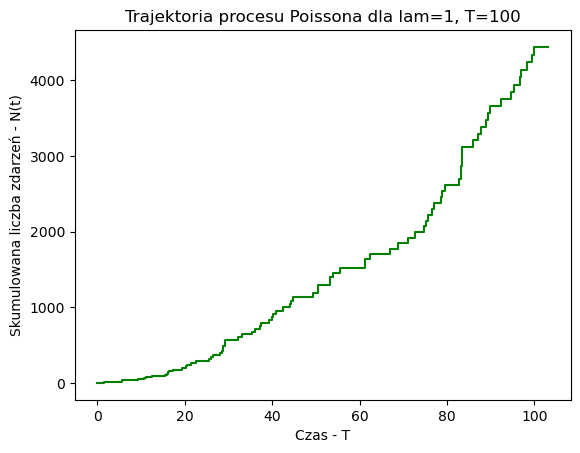

In [3]:
# Generujemy dla lambdy=1 na odcinku [0,10]
lam, T = 1, 100
x = metoda1(lam, T)

# Wykres trajektorii
plt.step(x, np.cumsum(x), color="green")
plt.title("Trajektoria procesu Poissona dla lam=1, T=100")
plt.ylabel("Skumulowana liczba zdarzeń - N(t)")
plt.xlabel("Czas - T")
plt.show()

C:\Users\ameli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ameli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


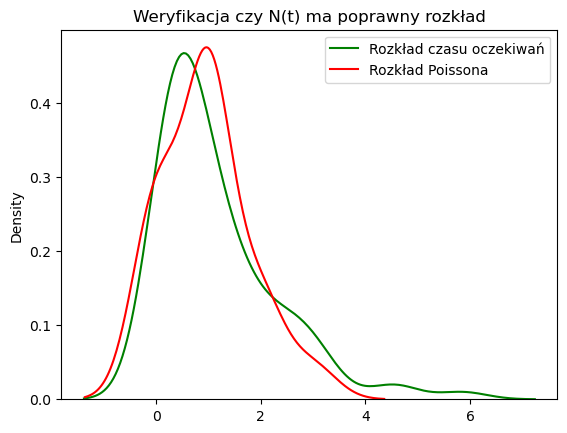

In [4]:
czas_oczekiwania = [x[i + 1] - x[i] for i in range(len(x) - 1)]

sns.kdeplot(czas_oczekiwania, label="Rozkład czasu oczekiwań", color="green")
sns.kdeplot(np.random.poisson(lam=1, size=20), label="Rozkład Poissona", color="red")
plt.title("Weryfikacja czy N(t) ma poprawny rozkład")
plt.legend()
plt.show()

### Metoda 2 - generowanie momentów skoku

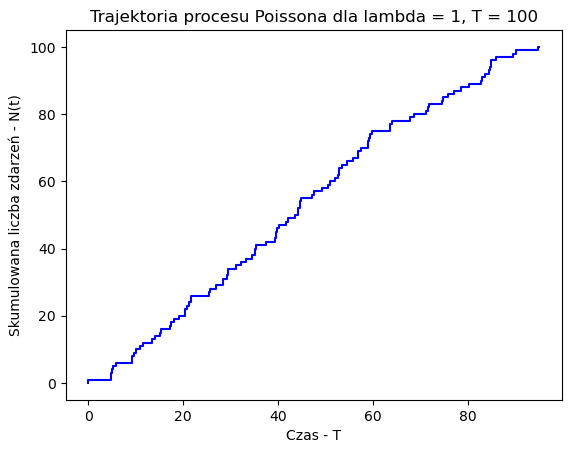

In [5]:
lam, T = 1, 100
N = np.random.poisson(lam * T)
assert N != 0

U = np.random.uniform(low=0, high=N, size=T)
U = np.append(U, 0)
U = np.sort(U)  # albo U.sort()

# Wykres trajektorii
plt.step(U, np.cumsum(U > 0), color="blue")
plt.title("Trajektoria procesu Poissona dla lambda = 1, T = 100")
plt.ylabel("Skumulowana liczba zdarzeń - N(t)")
plt.xlabel("Czas - T")
plt.show()

C:\Users\ameli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ameli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


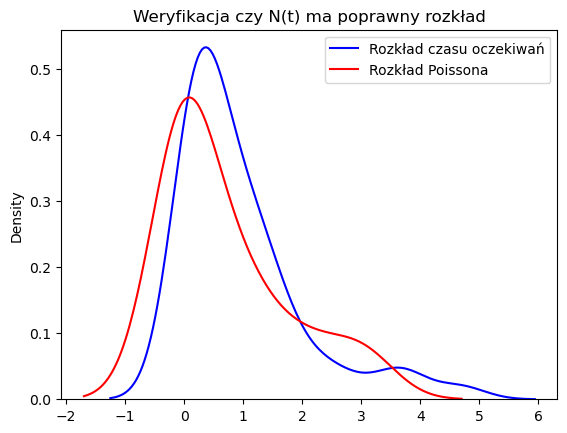

In [7]:
oczekiwanie = [U[i + 1] - U[i] for i in range(len(U) - 1)]

sns.kdeplot(oczekiwanie, label="Rozkład czasu oczekiwań", color="blue")
sns.kdeplot(np.random.poisson(lam=1, size=20), label="Rozkład Poissona", color="red")
plt.title("Weryfikacja czy N(t) ma poprawny rozkład")
plt.legend()
plt.show()